In [2]:
# Importing necessary libraries :
import torch  # PyTorch library for deep learning models and tensor operations
import matplotlib.pyplot as plt  # Matplotlib's pyplot for plotting graphs and visualizing data
import numpy as np  # NumPy for numerical operations and matrix manipulations
import cv2  # OpenCV library for image processing and computer vision tasks
import uuid  # UUID library for generating unique identifiers
import os  # OS library for interacting with the operating system, e.g., file and directory operations
import time  # Time library for time-related tasks, such as delays or measuring execution time
import yaml 


In [3]:
def load_config(file_path):
    """
    Loads configuration from a YAML file and returns the paths for images and the last model.

    Parameters:
    - file_path: str, path to the YAML configuration file.

    Returns:
    - A tuple containing the paths for images and the last model if both are found, None otherwise.
    """
    try:
        with open(file_path, 'r') as file:
            config_file = yaml.safe_load(file)

        if config_file and 'pathes' in config_file:
            pathes = config_file['pathes']
            if 'img' in pathes and 'last_model' in pathes:
                imgs = pathes['img']
                last_model = pathes['last_model']
                video_path = pathes['video_path']
                return imgs, last_model, video_path
            else:
                missing_keys = [key for key in ['img', 'last_model'] if key not in pathes]
                print(f"Missing keys in 'pathes': {', '.join(missing_keys)}")
                return None
        else:
            print("The 'pathes' key was not found in the YAML file.")
            return None
    except FileNotFoundError:
        print(f"The file path was not found.")
        return None
    except yaml.YAMLError as exc:
        print(f"An error occurred while parsing the YAML file: {exc}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


file_path = '../config/config.yaml'
imgs, last_model, video_path = load_config(file_path)


In [4]:
# Loading a pre-trained YOLOv5s model using PyTorch Hub
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Short Description:
# This line of code initializes and loads a pre-trained YOLOv5s model from the Ultralytics repository via PyTorch Hub.
# YOLOv5s is the smallest variant of the YOLOv5 models, designed for speed and efficiency with a compromise on accuracy.
# It is widely used for object detection tasks, capable of identifying and locating objects within images.
# PyTorch Hub is a pre-trained model repository designed to facilitate research reproducibility and accessibility.

Using cache found in /Users/ahmedalmaqbali/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-2-14 Python-3.11.7 torch-2.2.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [5]:
results = model(imgs) # The results of model for one image
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 480x640 11 cars, 2 buss, 5 trucks
Speed: 28.6ms pre-process, 245.1ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)

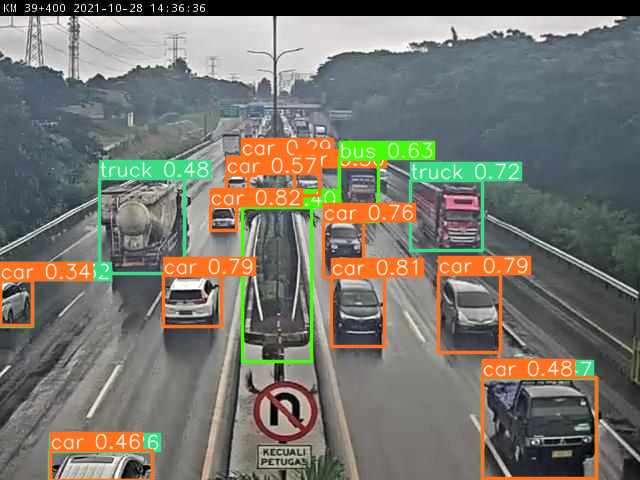

In [6]:
results.show() # Show the results 

In [7]:
results.xyxy[0]

tensor([[2.10780e+02, 2.06665e+02, 2.36284e+02, 2.30195e+02, 8.18169e-01, 2.00000e+00],
        [3.31652e+02, 2.76429e+02, 3.84245e+02, 3.46426e+02, 8.09533e-01, 2.00000e+00],
        [4.38695e+02, 2.74635e+02, 5.00267e+02, 3.52088e+02, 7.91859e-01, 2.00000e+00],
        [1.63278e+02, 2.75910e+02, 2.21267e+02, 3.26281e+02, 7.87592e-01, 2.00000e+00],
        [3.23121e+02, 2.21428e+02, 3.63553e+02, 2.77563e+02, 7.58090e-01, 2.00000e+00],
        [4.10252e+02, 1.80137e+02, 4.82053e+02, 2.50043e+02, 7.15562e-01, 7.00000e+00],
        [3.39239e+02, 1.59508e+02, 3.78150e+02, 2.21313e+02, 6.34129e-01, 5.00000e+00],
        [2.26805e+02, 1.74257e+02, 2.48714e+02, 2.01501e+02, 5.67319e-01, 2.00000e+00],
        [2.94522e+02, 1.67002e+02, 3.19414e+02, 1.95929e+02, 5.03695e-01, 2.00000e+00],
        [4.82547e+02, 3.77567e+02, 5.96586e+02, 4.79000e+02, 4.80471e-01, 2.00000e+00],
        [9.96902e+01, 1.78656e+02, 1.84770e+02, 2.73133e+02, 4.77112e-01, 7.00000e+00],
        [4.82588e+02, 3.78111e+0

In [8]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,210.780350,206.665314,236.284256,230.194672,0.818169,2,car
1,331.651825,276.428894,384.244598,346.425964,0.809533,2,car
2,438.694977,274.634521,500.266754,352.088379,0.791859,2,car
3,163.278168,275.909515,221.267303,326.281097,0.787592,2,car
4,323.121368,221.428360,363.552643,277.563416,0.758090,2,car
5,410.251526,180.137360,482.053284,250.043121,0.715562,7,truck
6,339.239380,159.508194,378.149902,221.313095,0.634129,5,bus
7,226.804565,174.256714,248.713684,201.501404,0.567319,2,car
8,294.522308,167.002228,319.414276,195.929016,0.503695,2,car
9,482.547150,377.567200,596.585938,478.999878,0.480471,2,car


In [9]:
# # Initialize the video capture with the given video path.
# # This will open the video file or stream for processing.
# cap = cv2.VideoCapture(video_path)

# # Check if the video was successfully opened.
# if not cap.isOpened():
#     print(f"Error opening video file or stream: {video_path}")
# else:
#     # Process the video frame by frame in a loop.
#     while True:
#         # Read a frame from the video.
#         ret, frame = cap.read()

#         # Break the loop if there are no more frames.
#         if not ret:
#             break

#         # Apply the model to the frame for object detection.
#         # The model expects a frame as input and will return its predictions.
#         results = model(frame)

#         # Render the predictions on the frame and display it.
#         # np.squeeze is used to remove single-dimensional entries from the shape of an array.
#         cv2.imshow('Frame with Detections', np.squeeze(results.render()))

#         # Wait for a short period for a key press. If 'q' is pressed, exit the loop.
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

#     # Release the video capture and close all OpenCV windows.
#     cap.release()
#     cv2.destroyAllWindows()


In [10]:
model = torch.hub.load("ultralytics/yolov5", "custom", path=last_model) # This is custom model

Using cache found in /Users/ahmedalmaqbali/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-2-14 Python-3.11.7 torch-2.2.0 CPU

Fusing layers... 
Model summary: 157 layers, 7042489 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [11]:
# # Initialize the video capture with the given video path.
# # This will open the video file or stream for processing.
# cap = cv2.VideoCapture(video_path)

# # Check if the video was successfully opened.
# if not cap.isOpened():
#     print(f"Error opening video file or stream: {video_path}")
# else:
#     # Process the video frame by frame in a loop.
#     while True:
#         # Read a frame from the video.
#         ret, frame = cap.read()

#         # Break the loop if there are no more frames.
#         if not ret:
#             break

#         # Apply the model to the frame for object detection.
#         # The model expects a frame as input and will return its predictions.
#         results = model(frame)

#         # Render the predictions on the frame and display it.
#         # np.squeeze is used to remove single-dimensional entries from the shape of an array.
#         cv2.imshow('Frame with Detections', np.squeeze(results.render()))

#         # Wait for a short period for a key press. If 'q' is pressed, exit the loop.
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

#     # Release the video capture and close all OpenCV windows.
#     cap.release()
#     cv2.destroyAllWindows()


In [12]:
results = model(imgs)

In [13]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 480x640 2 big trucks, 11 cars, 2 truck-l-s
Speed: 10.0ms pre-process, 232.4ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)

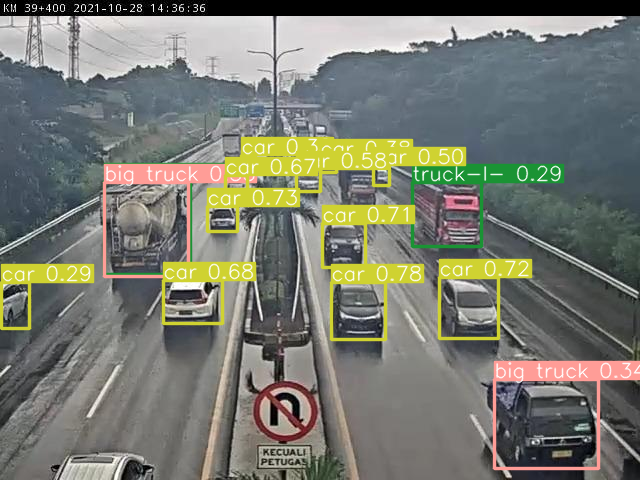

In [14]:
results.show()